In [1]:
#import the libraies

import pandas as pd
import numpy as np
from scipy.stats import skew

import matplotlib.pyplot as plt
import seaborn as sns


import warnings

warnings.filterwarnings('ignore')

# TABLE B EDA

In [2]:
from google.colab import files
f = files.upload()

Saving table_b_population_gdp_consumption.csv to table_b_population_gdp_consumption.csv


In [4]:
tableb=pd.read_csv('table_b_population_gdp_consumption.csv')

In [5]:
tableb.describe()

,year,population [number],gdp [$ million],energy_consumption [pj],energy_consumption_per_capita [gj/person],energy_intensity [gj/$ million],energy_productivity [$ million/pj]
count,504.000000,5.040000e+02,3.010000e+02,504.000000,504.000000,301.000000,301.000000
mean,1991.000000,4.438538e+06,4.144336e+05,1010.922716,233.787808,3800.330236,276.724352
std,18.202309,5.685886e+06,4.941766e+05,1357.245398,81.543806,798.726666,67.472232
min,1960.000000,4.448100e+04,1.111600e+04,4.700000,94.083000,1824.031000,181.373000
25%,1975.000000,7.034322e+05,7.124900e+04,113.782250,184.873750,3186.414000,228.696000
50%,1991.000000,2.117989e+06,2.922160e+05,539.350000,213.186000,3826.917000,261.307000
75%,2007.000000,5.260224e+06,5.049850e+05,1298.283000,268.680500,4372.617000,313.832000
max,2022.000000,2.665895e+07,2.403614e+06,6188.282000,598.545000,5513.501000,548.236000


In [6]:
tableb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year                                       504 non-null    int64  
 1   population [number]                        504 non-null    int64  
 2   gdp [$ million]                            301 non-null    float64
 3   energy_consumption [pj]                    504 non-null    float64
 4   energy_consumption_per_capita [gj/person]  504 non-null    float64
 5   energy_intensity [gj/$ million]            301 non-null    float64
 6   energy_productivity [$ million/pj]         301 non-null    float64
 7   state                                      504 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 31.6+ KB


In [11]:
print(tableb.isnull().sum())


year                                           0
population [number]                            0
gdp [$ million]                              203
energy_consumption [pj]                        0
energy_consumption_per_capita [gj/person]      0
energy_intensity [gj/$ million]              203
energy_productivity [$ million/pj]           203
state                                          0
dtype: int64


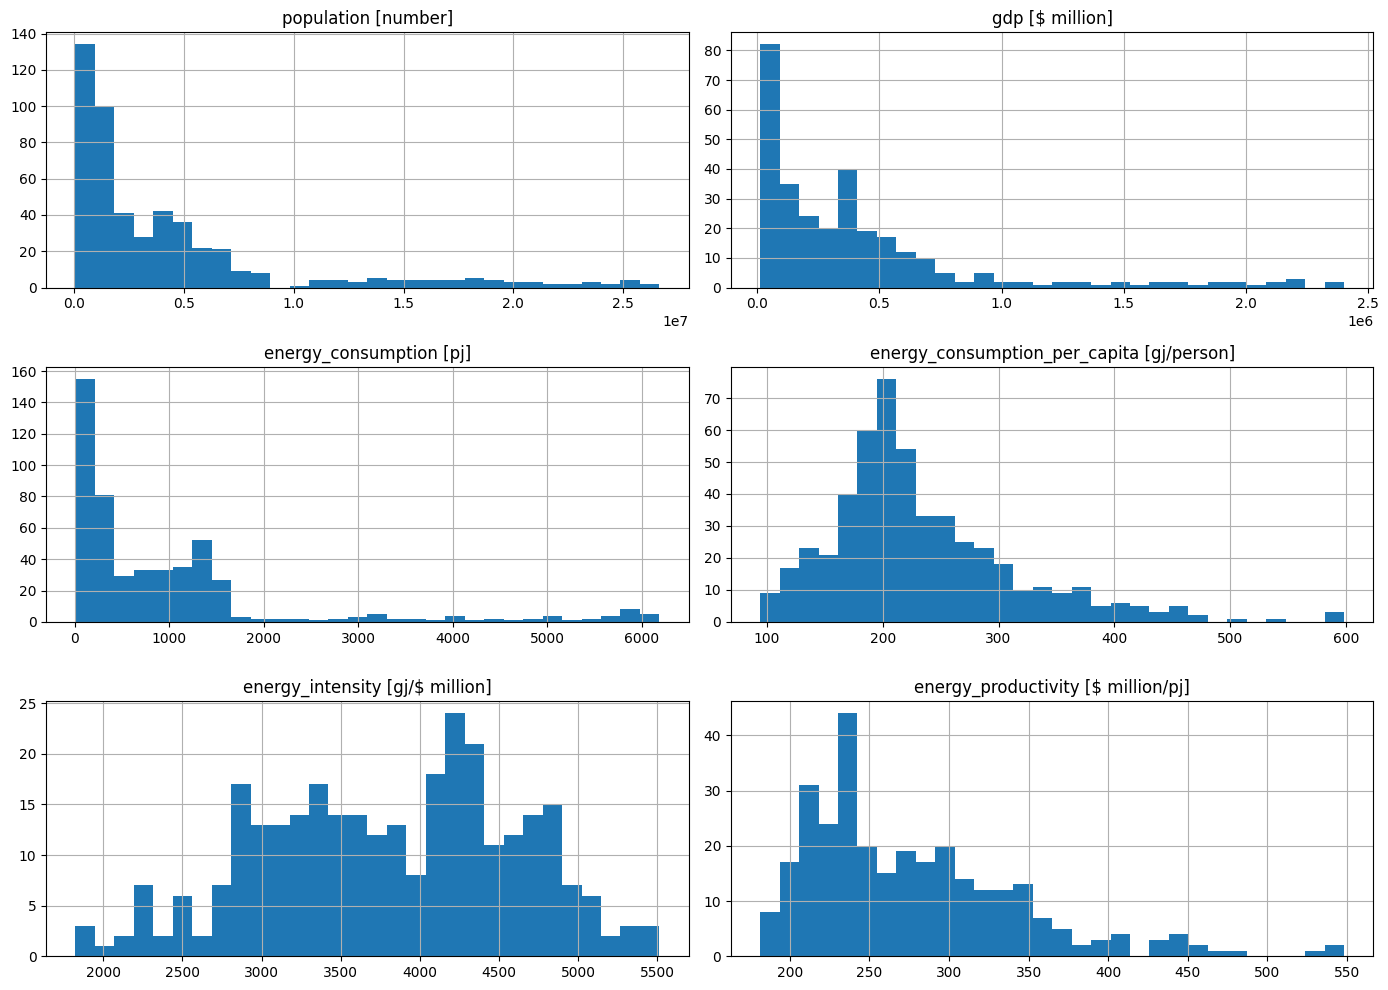

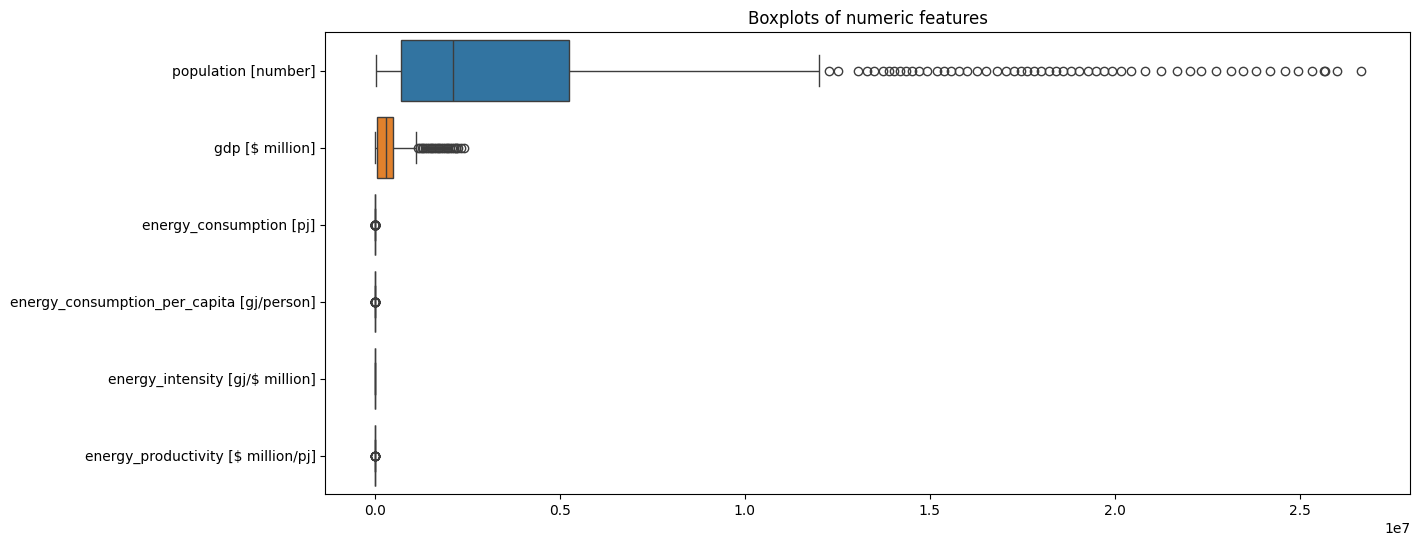

population [number]                 skewness = 2.06
gdp [$ million]                     skewness = 2.10
energy_consumption [pj]             skewness = 2.34
energy_consumption_per_capita [gj/person] skewness = 1.29
energy_intensity [gj/$ million]     skewness = -0.19
energy_productivity [$ million/pj]  skewness = 1.26


In [8]:
#  — Univariate distributions
num_cols = [
    'population [number]',
    'gdp [$ million]',
    'energy_consumption [pj]',
    'energy_consumption_per_capita [gj/person]',
    'energy_intensity [gj/$ million]',
    'energy_productivity [$ million/pj]'
]


tableb[num_cols].hist(bins=30, figsize=(14,10))
plt.tight_layout()
plt.show()

# Boxplots (to spot outliers)
plt.figure(figsize=(14,6))
sns.boxplot(data=tableb[num_cols], orient='h')
plt.title("Boxplots of numeric features")
plt.show()

# Skewness
from scipy.stats import skew
for col in num_cols:
    print(f"{col:<35} skewness = {skew(tableb[col].dropna()):.2f}")


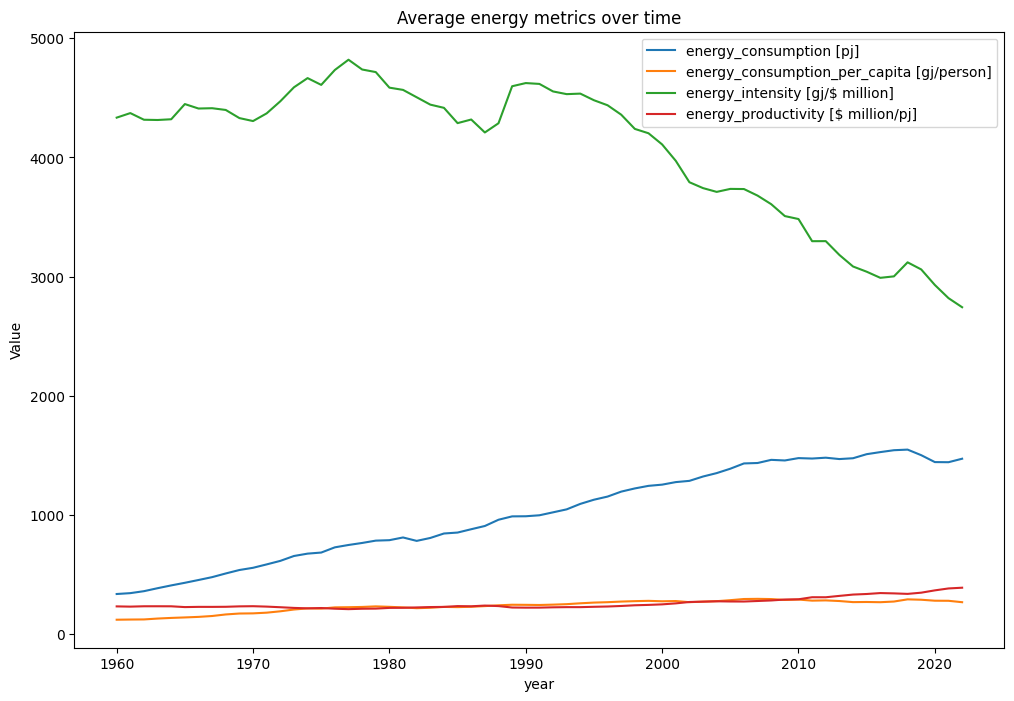

In [9]:
#  — Time-series trends (aggregate over all states)
yearly = tableb.groupby('year')[[
    'energy_consumption [pj]',
    'energy_consumption_per_capita [gj/person]',
    'energy_intensity [gj/$ million]',
    'energy_productivity [$ million/pj]'
]].mean().reset_index()

plt.figure(figsize=(12,8))
for col in yearly.columns[1:]:
    sns.lineplot(data=yearly, x='year', y=col, label=col)
plt.title("Average energy metrics over time")
plt.ylabel("Value")
plt.legend()
plt.show()

Look for long-term trends, peaks or structural breaks around certain years.

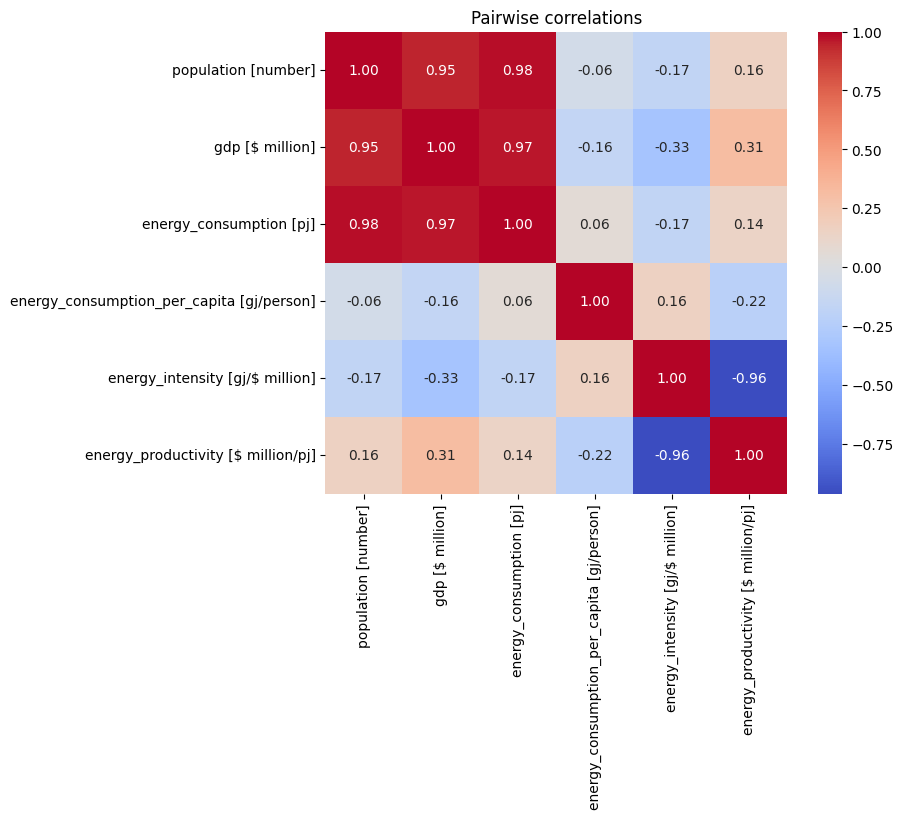

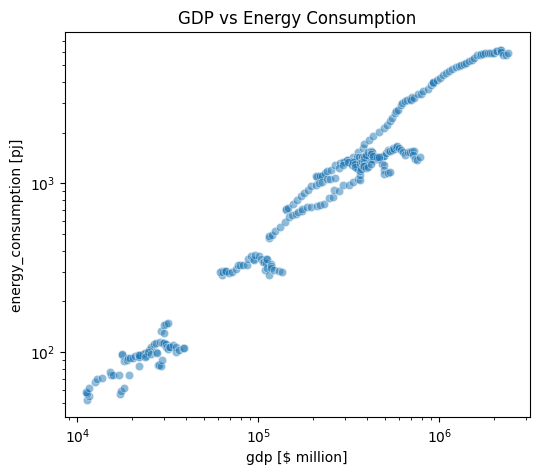

In [16]:
#Bivariate & correlation analysis

corr = tableb[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Pairwise correlations")
plt.show()


plt.figure(figsize=(6,5))
sns.scatterplot(
    data=tableb,
    x='gdp [$ million]',
    y='energy_consumption [pj]',
    alpha=0.5
)
plt.title("GDP vs Energy Consumption")
plt.xscale('log')
plt.yscale('log')
plt.show()

The higher the GDP, the higher the energy consumption.

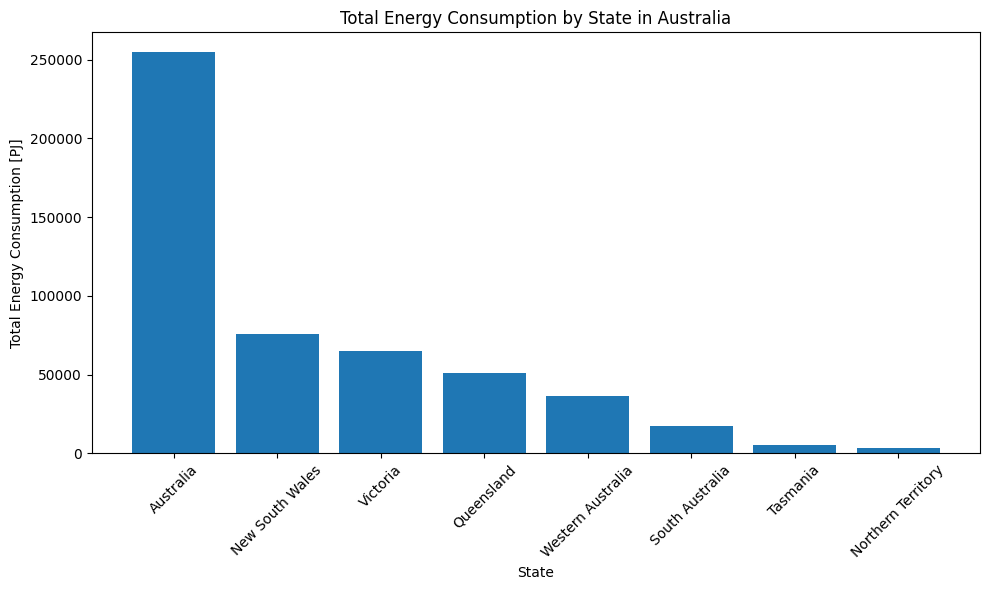

In [14]:


# Aggregate total energy consumption per state
state_consumption = (
    tableb
    .groupby('state')['energy_consumption [pj]']
    .sum()
    .sort_values(ascending=False)
)


plt.figure(figsize=(10, 6))
plt.bar(state_consumption.index, state_consumption.values)
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Total Energy Consumption [PJ]')
plt.title('Total Energy Consumption by State in Australia')
plt.tight_layout()
plt.show()


The New South Walese has higher energy consumption by total and the northern territory has least overall.

# Table C EDA

In [17]:
from google.colab import files
f = files.upload()

Saving table_c_consumption_by_fuel.csv to table_c_consumption_by_fuel.csv


In [18]:
tablec = pd.read_csv('table_c_consumption_by_fuel.csv')

In [19]:
tablec.describe()

,year,oil_ [pj],gas_ [pj],renewables_ [pj],total_ [pj]
count,168.000000,168.000000,168.000000,168.000000,168.000000
mean,2006.000000,786.014548,397.162988,128.952560,2046.221321
std,16.501134,702.078882,429.030749,114.466005,1879.773674
min,1960.000000,33.420000,0.000000,0.372000,83.320000
25%,2001.750000,148.411000,100.309250,39.595500,353.141000
50%,2012.000000,531.876500,249.488000,89.857500,1430.257500
75%,2017.000000,1339.175000,598.770750,204.500000,3135.125000
max,2022.000000,2424.419000,1623.785000,553.559000,6188.282000


In [20]:
tablec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             168 non-null    int64  
 1   coal_ [pj]                       153 non-null    object 
 2   oil_ [pj]                        168 non-null    float64
 3   gas_ [pj]                        168 non-null    float64
 4   renewables_ [pj]                 168 non-null    float64
 5   statistical_discrepancy_b_ [pj]  168 non-null    object 
 6   total_ [pj]                      168 non-null    float64
 7   state                            168 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 10.6+ KB


In [21]:
# convert “na” → NaN and columns to float
fuel_cols = ['coal_ [pj]', 'statistical_discrepancy_b_ [pj]']
for c in fuel_cols:
    tablec[c] = pd.to_numeric(tablec[c].replace('na', np.nan))


There were some NAN value and need to conver to the na

In [23]:
print(tablec.isnull().mean().round(3) * 100)


year                                0.0
coal_ [pj]                         16.7
oil_ [pj]                           0.0
gas_ [pj]                           0.0
renewables_ [pj]                    0.0
statistical_discrepancy_b_ [pj]     7.7
total_ [pj]                         0.0
state                               0.0
dtype: float64


Text(0.5, 0.98, 'Histograms of fuel consumption')

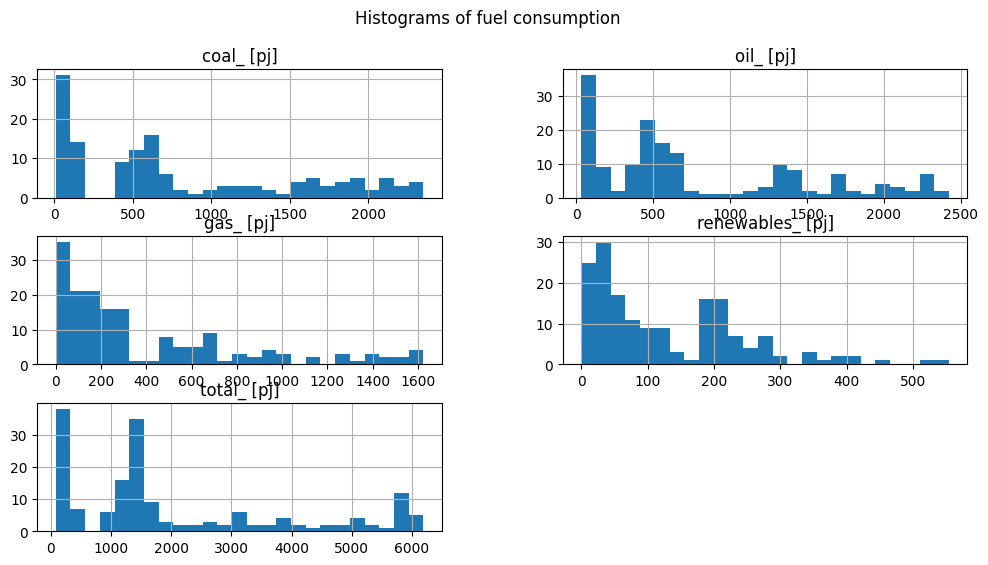

In [24]:
fuel_cols = ['coal_ [pj]', 'oil_ [pj]', 'gas_ [pj]', 'renewables_ [pj]','total_ [pj]']
tablec[fuel_cols].hist(bins=25, figsize=(12,6))
plt.suptitle("Histograms of fuel consumption")

Text(0, 0.5, 'Consumption [PJ]')

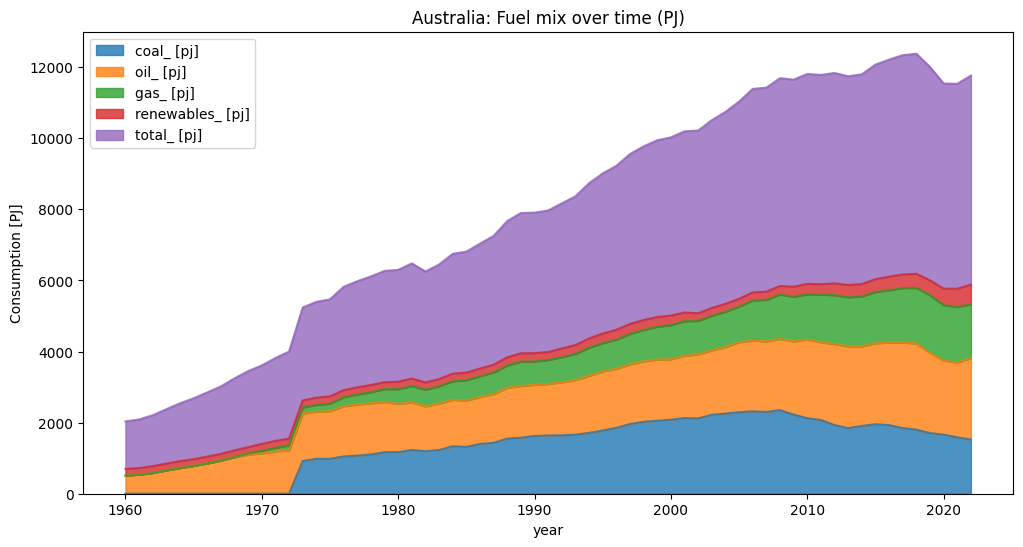

In [28]:
# checj fuel’s share evolves over time
nat = tablec[tablec.state == 'Australia'].set_index('year')[fuel_cols]
nat.plot.area(figsize=(12,6), alpha=0.8)
plt.title("Australia: Fuel mix over time (PJ)")
plt.ylabel("Consumption [PJ]")



Text(0.5, 1.0, 'Avg fuel‐share by state')

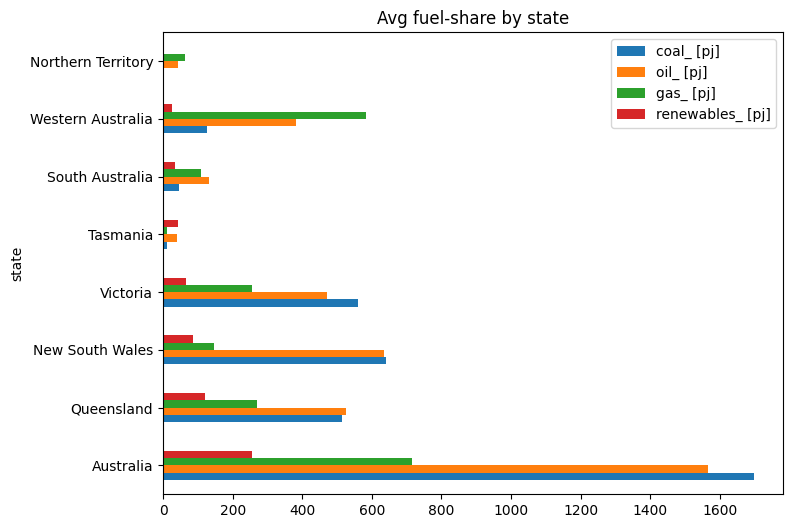

In [33]:
state_shares = (
    tablec
    .groupby('state')[['coal_ [pj]','oil_ [pj]','gas_ [pj]','renewables_ [pj]']]
    .mean()
    .sort_values('renewables_ [pj]', ascending=False)
)
state_shares.head(10)
# display as bar or clustered bar chart
state_shares.plot.barh(figsize=(8,6))
plt.title("Avg fuel‐share by state")

this table could develop the Energy Consumption by Source and State

#Table D EDA

In [34]:
from google.colab import files
f = files.upload()

Saving table_d_consumption_detailed_fuel_all_states.csv to table_d_consumption_detailed_fuel_all_states.csv


In [36]:
tabled = pd.read_csv('table_d_consumption_detailed_fuel_all_states.csv')

In [38]:
tabled.head()

,year,fuel,energy_[pj],category,state
0,1960.0,black_coal [pj],495.3,consumption_of_fuels,Australia
1,1961.0,black_coal [pj],492.3,consumption_of_fuels,Australia
2,1962.0,black_coal [pj],494.3,consumption_of_fuels,Australia
3,1963.0,black_coal [pj],517.0,consumption_of_fuels,Australia
4,1964.0,black_coal [pj],531.5,consumption_of_fuels,Australia


In [39]:
tabled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10849 entries, 0 to 10848
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         9576 non-null   float64
 1   fuel         10849 non-null  object 
 2   energy_[pj]  4730 non-null   float64
 3   category     10849 non-null  object 
 4   state        10849 non-null  object 
dtypes: float64(2), object(3)
memory usage: 423.9+ KB


In [40]:
tabled.describe()

,year,energy_[pj]
count,9576.000000,4730.000000
mean,1991.000000,276.192840
std,18.185192,611.340414
min,1960.000000,0.000000
25%,1975.000000,7.398500
50%,1991.000000,55.506500
75%,2007.000000,242.572000
max,2022.000000,6188.282000


In [56]:
# replace 'na' with NaN and convert all fuel cols to float
fuel_cols = [c for c in tabled.columns if '[pj]	' in c]
for c in fuel_cols:
    tabled[c] = pd.to_numeric(tabled[c].replace('na', np.nan))


# Table E EDA

In [59]:
from google.colab import files
f = files.upload()

Saving table_e_consumption_by_industry.csv to table_e_consumption_by_industry.csv


In [60]:
tablee = pd.read_csv('table_e_consumption_by_industry.csv')

In [61]:

tablee.head()

,year,industry,energy,unit,state
0,1974,agriculture_pj,39.4,38.7,Australia
1,1975,agriculture_pj,39.9,38.7,Australia
2,1976,agriculture_pj,41.2,38.7,Australia
3,1977,agriculture_pj,43.3,38.7,Australia
4,1978,agriculture_pj,44.9,38.7,Australia


In [63]:

tablee.describe()



,year,energy,unit
count,4312.000000,4312.000000,4312.000000
mean,1998.000000,211.716490,118.872727
std,14.143776,585.888132,325.492513
min,1974.000000,0.002000,0.100000
25%,1986.000000,6.000000,4.275000
50%,1998.000000,26.122500,16.450000
75%,2010.000000,156.593750,73.925000
max,2022.000000,6188.282000,2615.200000


In [64]:
tablee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      4312 non-null   int64  
 1   industry  4312 non-null   object 
 2   energy    4312 non-null   float64
 3   unit      4312 non-null   float64
 4   state     4312 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 168.6+ KB


In [65]:
#  Inspect structure and nulls
print(tablee.info())
print(tablee.isnull().sum())

#  List unique industries and states
print("Industries:", tablee['industry'].unique())
print("States:",    tablee['state'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      4312 non-null   int64  
 1   industry  4312 non-null   object 
 2   energy    4312 non-null   float64
 3   unit      4312 non-null   float64
 4   state     4312 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 168.6+ KB
None
year        0
industry    0
energy      0
unit        0
state       0
dtype: int64
Industries: ['agriculture_pj' 'mining_pj' 'manufacturing_pj'
 'electricity_generation_pj' 'construction_pj' 'transport_pj'
 'water_and_waste_b_pj' 'commercial_and_services_c_pj' 'residential_pj'
 'other_d_pj' 'total_pj']
States: ['Australia' 'New South Wales' 'Victoria' 'Queensland' 'South Australia'
 'Western Australia' 'Tasmania' 'Northern Territory']


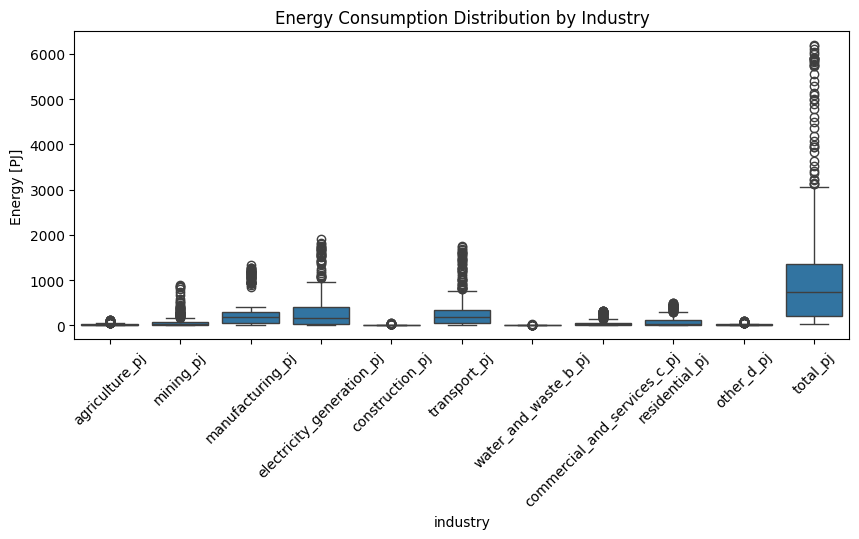

In [71]:


# Boxplot to spot outliers in each industry
plt.figure(figsize=(10,4))
sns.boxplot(data=tablee, x='industry', y='energy')
plt.xticks(rotation=45)
plt.title("Energy Consumption Distribution by Industry")
plt.ylabel("Energy [PJ]")
plt.show()

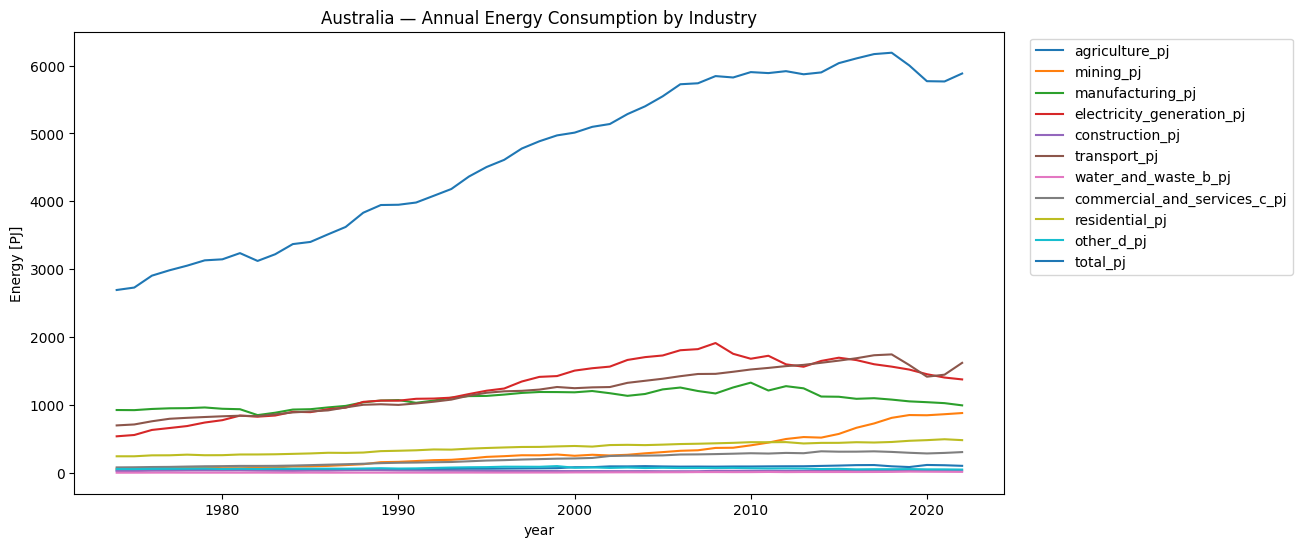

In [68]:
# Filter Australia-wide data
national = tablee[tablee.state == 'Australia']

# Line plots of each industry’s annual consumption
plt.figure(figsize=(12,6))
for ind in national['industry'].unique():
    subset = national[national.industry == ind]
    sns.lineplot(data=subset, x='year', y='energy', label=ind)

plt.title("Australia — Annual Energy Consumption by Industry")
plt.ylabel("Energy [PJ]")
plt.legend(bbox_to_anchor=(1.02,1))
plt.show()


see the landscape of annual enegry consumption by industry

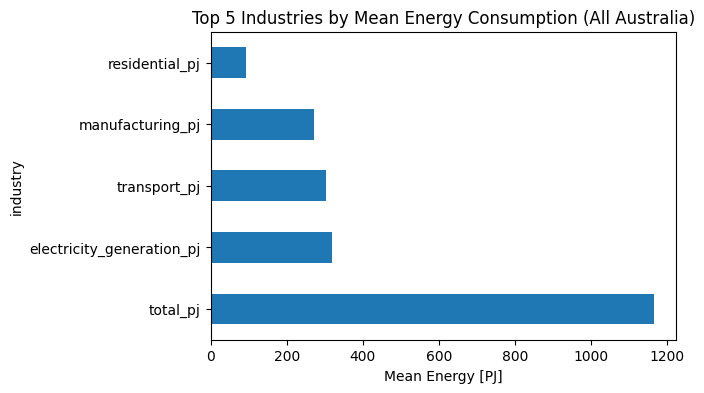

In [70]:
# Overall mean consumption across all states and years
avg_by_industry = (
    tablee
    .groupby('industry')['energy']
    .mean()
    .sort_values(ascending=False)
)
avg_by_industry.head(5).plot.barh(figsize=(6,4))
plt.title("Top 5 Industries by Mean Energy Consumption (All Australia)")
plt.xlabel("Mean Energy [PJ]")
plt.show()


The ranking by mean energy consumption through all states of Australia is Electricity, next is transport, manufacturing than redidential.

# Table O EDA

In [74]:
from google.colab import files
f = files.upload()

Saving table_o_electricity_generation.csv to table_o_electricity_generation (2).csv


In [76]:
tableo = pd.read_csv('table_o_electricity_generation.csv')

In [77]:
tableo.head()

,fuel_name,year,generation,unit,state,type
0,Black coal,1989.0,87573.0,gwh,Australia,non-renewable
1,Brown coal,1989.0,33594.0,gwh,Australia,non-renewable
2,Natural gas,1989.0,14359.0,gwh,Australia,non-renewable
3,Oil products,1989.0,3552.0,gwh,Australia,non-renewable
4,Other a,1989.0,NaN,gwh,Australia,non-renewable


In [78]:
tableo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fuel_name   1851 non-null   object 
 1   year        2236 non-null   float64
 2   generation  1206 non-null   float64
 3   unit        2276 non-null   object 
 4   state       2276 non-null   object 
 5   type        2130 non-null   object 
dtypes: float64(2), object(4)
memory usage: 106.8+ KB


In [80]:
tableo.describe()

,year,generation
count,2236.000000,1206.000000
mean,2013.008497,11567.785698
std,7.279859,28166.587603
min,1989.000000,0.039000
25%,2010.000000,205.425000
50%,2014.000000,1373.103173
75%,2018.000000,7569.466672
max,2022.000000,227653.228465


In [81]:
# If any “na” strings, convert to NaN and numeric
for col in tableo.columns:
    if tableo[col].dtype == object:
        tableo[col] = pd.to_numeric(tableo[col].replace('na', pd.NA), errors='ignore')

# Make sure year, state are categorical/text
tableo['state'] = tableo['state'].astype(str)


Text(0.5, 1.0, 'Renewable vs Non-renewable Generation Over Time')

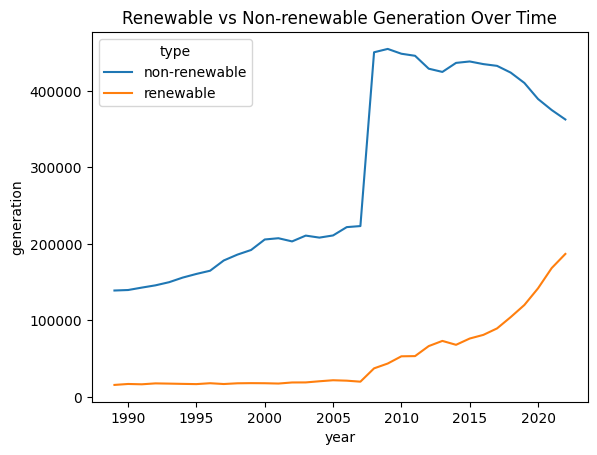

In [86]:
nat = tableo.groupby(['year','type'])['generation'].sum().reset_index()
sns.lineplot(data=nat, x='year', y='generation', hue='type')
plt.title("Renewable vs Non-renewable Generation Over Time")


In [100]:

exclude = ['Bioenergy breakdown', 'Industry and state', 'Industry breakdown']
tableo = tableo[~tableo['state'].isin(exclude)]

# Pivot to wide format: one row per state, one column per fuel source
wide = tableo.pivot_table(
    index='state',
    columns='fuel_name',
    values='generation',
    aggfunc='sum'
)

# Identify renewable vs non-renewable sources
renewable_sources = ['Hydro', 'Wind', 'Solar', 'Biofuels']
available = wide.columns.tolist()
renew_cols = [c for c in available if c in renewable_sources]
nonrenew_cols = [c for c in available if c not in renewable_sources]

# Sum up per-state totals
renew_sum = wide[renew_cols].sum(axis=1)
nonrenew_sum = wide[nonrenew_cols].sum(axis=1)

# Calculate total and percentages
results = pd.DataFrame({
    'Renewable_PJ': renew_sum,
    'NonRenewable_PJ': nonrenew_sum
})
results['Total_PJ'] = results['Renewable_PJ'] + results['NonRenewable_PJ']

results['Renewable_%'] = (
    results['Renewable_PJ']
    / results['Total_PJ']
    * 100
).round(2)

results['NonRenewable_%'] = (
    results['NonRenewable_PJ']
    / results['Total_PJ']
    * 100
).round(2)



In [101]:
results.head()

,Renewable_PJ,NonRenewable_PJ,Total_PJ,Renewable_%,NonRenewable_%
state,,,,,
Australia,761393.832285,6.890684e+06,7.652078e+06,9.95,90.05
New South Wales,76893.034597,9.707579e+05,1.047651e+06,7.34,92.66
Northern Territory,0.000000,5.644352e+04,5.644352e+04,0.00,100.00
Queensland,19476.838157,9.852178e+05,1.004695e+06,1.94,98.06
South Australia,66835.027722,1.427884e+05,2.096234e+05,31.88,68.12


Sort it by the percentage of rewnable DESC

In [102]:

ranked = results.sort_values('Renewable_%', ascending=False).reset_index()

In [103]:
ranked.head()

,state,Renewable_PJ,NonRenewable_PJ,Total_PJ,Renewable_%,NonRenewable_%
0,Tasmania,152318.752312,1.463914e+04,1.669579e+05,91.23,8.77
1,South Australia,66835.027722,1.427884e+05,2.096234e+05,31.88,68.12
2,Victoria,104561.907571,7.128087e+05,8.173706e+05,12.79,87.21
3,Australia,761393.832285,6.890684e+06,7.652078e+06,9.95,90.05
4,New South Wales,76893.034597,9.707579e+05,1.047651e+06,7.34,92.66


The Tasmania state has higher ranking for usage of Renewable enegery from other states where as the NSW is the least from the ranking.

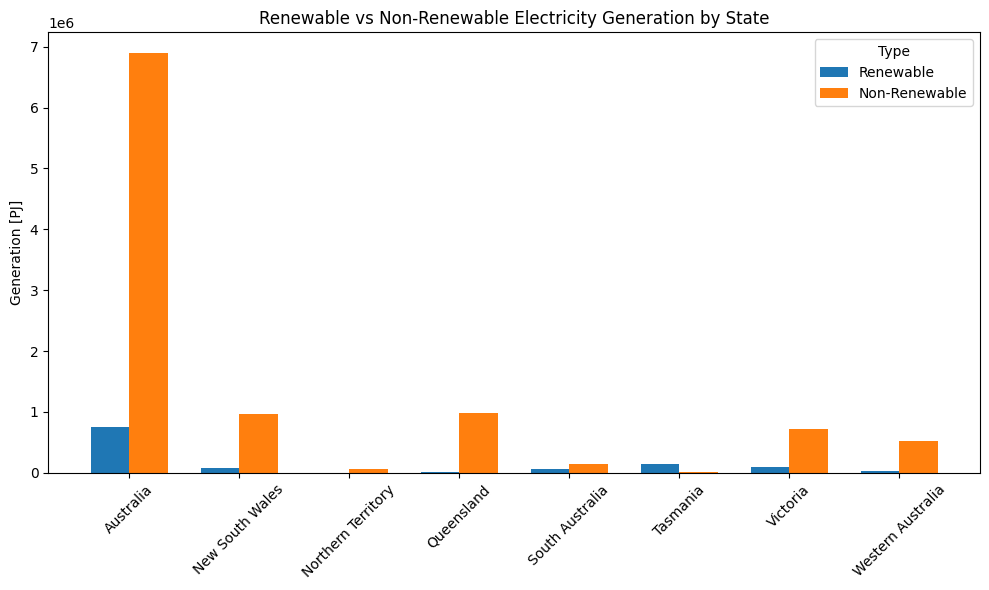

In [92]:
# Exclude unwanted state entries
exclude = ['Bioenergy breakdown', 'Industry and state', 'Industry breakdown']
tableo = tableo[~tableo['state'].isin(exclude)]

# Pivot to wide format and sum per source
wide = tableo.pivot_table(
    index='state',
    columns='fuel_name',
    values='generation',
    aggfunc='sum'
)

# Identify renewables vs non-renewables
renewable_sources = ['Hydro', 'Wind', 'Solar', 'Biofuels']
renew_cols = [c for c in wide.columns if c in renewable_sources]
nonrenew_cols = [c for c in wide.columns if c not in renewable_sources]

# Sum up per-state totals
renew_sum = wide[renew_cols].sum(axis=1)
nonrenew_sum = wide[nonrenew_cols].sum(axis=1)


df = pd.DataFrame({
    'Renewable': renew_sum,
    'Non-Renewable': nonrenew_sum
})

states = df.index
x = np.arange(len(states))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, df['Renewable'], width, label='Renewable')
ax.bar(x + width/2, df['Non-Renewable'], width, label='Non-Renewable')

ax.set_xticks(x)
ax.set_xticklabels(states, rotation=45)
ax.set_ylabel('Generation [PJ]')
ax.set_title('Renewable vs Non-Renewable Electricity Generation by State')
ax.legend(title='Type')
plt.tight_layout()
plt.show()

A overall of the renewable % VS non renewable % per each state by bar charts